# Pylops - seismic transforms on GPU with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-07-24 11:08:21--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-07-24 11:08:21--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 60.3M 1s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-3.4.7         |   py36hd23ed53_0         1.0 MB
    ld_impl_linux-64-2.35.1    |       h7274673_9         637 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    idna-2.10                  |     pyhd3eb1b0_0          52 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    requests-2.25.1            |     pyhd3eb1b0_0          51 KB
    wheel-0.36.2               |     pyhd3eb1b0_0          31 KB
    pyopenssl-20.0.1           |     pyhd3eb1b0_1          48 KB
    certifi-2021.5.30          |   py36h06a4308_0   

cryptography-3.4.7   |  1.0 MB | ########## | 100% 
ld_impl_linux-64-2.3 |  637 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
idna-2.10            |   52 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
requests-2.25.1      |   51 KB | ########## | 100% 
wheel-0.36.2         |   31 KB | ########## | 100% 
pyopenssl-20.0.1     |   48 KB | ########## | 100% 
certifi-2021.5.30    |  141 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
brotlipy-0.7.0       |  349 KB | ########## | 100% 
sqlite-3.36.0        |  1.4 MB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
ruamel_yaml-0.15.100 |  268 KB | ########## | 100% 
cffi-1.14.6          |  224 KB | ########## | 100% 
openssl-1.1.1k       |  3.8 MB | ########## | 100% 
tk-8.6.10   

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.13 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.76.0               |   py36h706143c_0         338 KB  conda-forge
    boost-cpp-1.76.0           |       h312852a_1        17.1 MB  conda-forge
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    conda-4.10.3               |   py36h5fab9bb_0         3.1 MB  conda-forge
    cudatoolkit-10.1.243       |       h036e899_8       427.5 MB  conda-forge
    cudnn-7.6.5.32             |       hc0a50b0_1 

In [7]:
!pip install pyfftw

     |████████████████████████████████| 2.6 MB 42.1 MB/s 


In [8]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
!pip install pylops[advanced]
!pip install pylops-gpu

     |████████████████████████████████| 114.9 MB 14 kB/s 
     |████████████████████████████████| 180 kB 24.6 MB/s 
     |████████████████████████████████| 4.4 MB 39.4 MB/s 
     |████████████████████████████████| 421 kB 71.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-fmm: filename=scikit_fmm-2021.7.8-cp36-cp36m-linux_x86_64.whl size=208299 sha256=ce7369a3026205ea99e88d440b0fa429a8e00e0df7abde05b630600383adda6a
  Stored in directory: /root/.cache/pip/wheels/fa/a4/6c/768c49c4fd55ea56d2b921849a05c835272c5748a8a5eb879e
Successfully built scikit-fmm
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |████████████████████████████████| 831.4 MB 6.9 kB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 3.0 MB 48.4 MB/s 
  Created wheel for pytorch-complex-tensor: filename=pytorch_complex_tensor-0.0.134-py3-none-any.whl 

In [9]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [10]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from scipy.sparse.linalg import inv, lsqr
from scipy.sparse import rand

from pylops.utils import dottest
from pylops.utils.seismicevents import *
from pylops.utils.wavelets import *
from pylops.utils.tapers import *
from pylops import LinearOperator
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.waveeqprocessing import *
from pylops_gpu import TorchOperator

# ChirpRadon

In [12]:
par = {'ot': 0,    'dt': 0.004, 'nt': 201,
       'ox': -625, 'dx': 12.5, 'nx': 101,
       'oy': -625, 'dy': 12.5, 'ny': 101,
       'f0': 20}
theta = [30, ]
phi = [0, ]
t0 = [0.5, ]
amp = [1., ]

# Create axis
t, t2, x, y = makeaxis(par)
dt, dx, dy = par['dt'], par['dx'], par['dy']

# Create wavelet
wav = ricker(t[:41], f0=par['f0'])[0]

# Generate model
_, d = linear3d(x, y, t, 1500., t0, theta, phi, amp, wav)

d = cp.array(d)

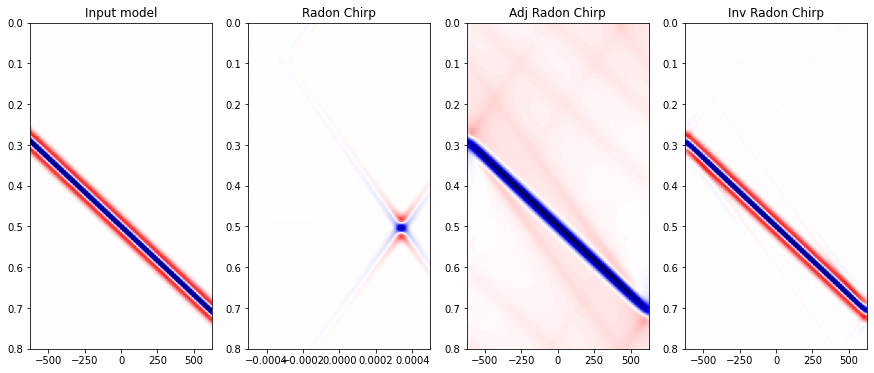

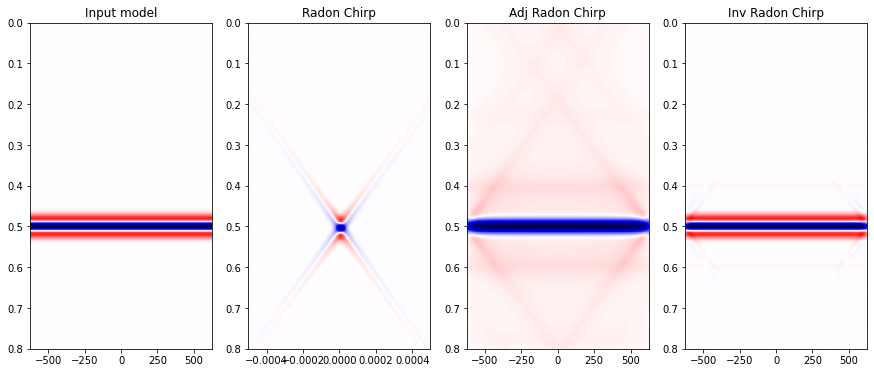

In [13]:
npy, pymax = par['ny'], 5e-4
npx, pxmax = par['nx'], 5e-4

py = np.linspace(-pymax, pymax, npy)
px = np.linspace(-pxmax, pxmax, npx)

R3Op = ChirpRadon3D(t, y, x, (pymax*dy/dt, pxmax*dx/dt), dtype='float64')

dL_chirp = R3Op * d.ravel()
dadj_chirp = R3Op.H * dL_chirp
dinv_chirp = R3Op.inverse(dL_chirp)

dL_chirp = dL_chirp.reshape(par['ny'], par['nx'], par['nt'])
dadj_chirp = dadj_chirp.reshape(par['ny'], par['nx'], par['nt'])
dinv_chirp = dinv_chirp.reshape(par['ny'], par['nx'], par['nt'])

fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].imshow(cp.asnumpy(d[par['ny']//2]).T, vmin=-1, vmax=1, cmap='seismic_r',
              extent=(x[0], x[-1], t[-1], t[0]))
axs[0].set_title('Input model')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(dL_chirp[npy//2]).T, cmap='seismic_r', vmin=-dL_chirp.max(), vmax=dL_chirp.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[1].set_title('Radon Chirp')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(dadj_chirp[par['ny']//2]).T, cmap='seismic_r', vmin=-dadj_chirp.max(), vmax=dadj_chirp.max(),
              extent=(x[0], x[-1], t[-1], t[0]))
axs[2].set_title('Adj Radon Chirp')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(dinv_chirp[par['ny']//2]).T, cmap='seismic_r', vmin=-d.max(), vmax=d.max(),
              extent=(x[0], x[-1], t[-1], t[0]))
axs[3].set_title('Inv Radon Chirp')
axs[3].axis('tight');

fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].imshow(cp.asnumpy(d[:, par['nx']//2]).T, vmin=-1, vmax=1, cmap='seismic_r',
              extent=(y[0], y[-1], t[-1], t[0]))
axs[0].set_title('Input model')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(dL_chirp[:, 85]).T, cmap='seismic_r', vmin=-dL_chirp.max(), vmax=dL_chirp.max(),
              extent=(py[0], py[-1], t[-1], t[0]))
axs[1].set_title('Radon Chirp')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(dadj_chirp[:, par['nx']//2]).T, cmap='seismic_r', vmin=-dadj_chirp.max(), vmax=dadj_chirp.max(),
              extent=(y[0], y[-1], t[-1], t[0]))
axs[2].set_title('Adj Radon Chirp')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(dinv_chirp[:, par['nx']//2]).T, cmap='seismic_r', vmin=-d.max(), vmax=d.max(),
              extent=(y[0], y[-1], t[-1], t[0]))
axs[3].set_title('Inv Radon Chirp')
axs[3].axis('tight');

In [14]:
d_np = cp.asnumpy(d) 

%timeit -n2 -r2 R3Op * d.ravel()
%timeit -n2 -r2 R3Op * d_np.ravel()

2 loops, best of 2: 1.53 ms per loop
2 loops, best of 2: 1.61 s per loop


In [15]:
dL_chirp_np = cp.asnumpy(dL_chirp) 

%timeit -n2 -r2 R3Op.H * dL_chirp.ravel()
%timeit -n2 -r2 R3Op.H * dL_chirp_np.ravel()

2 loops, best of 2: 1.61 ms per loop
2 loops, best of 2: 1.6 s per loop


# PhaseShift

In [16]:
par = {'ox':-1000, 'dx':20, 'nx':101,
       'oy':-1000, 'dy':20, 'ny':101,
       'ot':0, 'dt':0.004, 'nt':151,
       'f0': 20, 'nfmax': 210}

# Create axis
t, t2, x, y = makeaxis(par)

# Create wavelet
wav = ricker(np.arange(41) * par['dt'], f0=par['f0'])[0]

vrms = [2000, 2200, 3000]
t0 = [0.1, 0.2, 0.25]
amp = [1., 0.6, -2.]

_, m = hyperbolic3d(x, y, t, t0, vrms, vrms, amp, wav)

pad = 11
taper = taper3d(par['nt'], (par['ny'], par['nx']), (3, 3))
mpad = np.pad(m*taper, ((pad, pad), (pad, pad), (0, 0)), mode='constant')
mpad = mpad.transpose(2, 1, 0)

vel = 1500.
zprop = 200
freq = np.fft.rfftfreq(par['nt'], par['dt'])
kx = np.fft.fftshift(np.fft.fftfreq(par['nx'] + 2*pad, par['dx']))
ky = np.fft.fftshift(np.fft.fftfreq(par['ny'] + 2*pad, par['dy']))
Pop = PhaseShift(vel, zprop, par['nt'], freq, kx, ky)
Pop_cp = PhaseShift(vel, zprop, par['nt'], freq, kx, ky)

mdown = Pop * mpad.ravel()
mup = Pop.H * mdown.ravel()

In [17]:
mpad_cp = cp.asarray(mpad) 

%timeit -n2 -r2 Pop * mpad.ravel()
%timeit -n2 -r2 Pop_cp * mpad_cp.ravel()

2 loops, best of 2: 720 ms per loop
The slowest run took 476.00 times longer than the fastest. This could mean that an intermediate result is being cached.
2 loops, best of 2: 1.79 ms per loop


In [18]:
mdown_cp = cp.asarray(mdown) 

%timeit -n2 -r2 Pop.H * mdown.ravel()
%timeit -n2 -r2 Pop_cp.H * mdown_cp.ravel()

2 loops, best of 2: 748 ms per loop
2 loops, best of 2: 1.47 ms per loop


# Pytorch / Cupy integration

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [20]:
class Network(nn.Module):
    def __init__(self, input_channels):
        super(Network, self).__init__()
        self.conv1 = nn.Conv3d(input_channels, input_channels // 2, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(input_channels // 2, input_channels // 4, kernel_size=3, padding=1)
        self.conv3 = nn.Conv3d(input_channels // 4, input_channels // 8, kernel_size=3, padding=1)
        self.conv4 = nn.Conv3d(input_channels // 8, input_channels // 32, kernel_size=3, padding=1)
        self.activation = nn.LeakyReLU(0.2)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.conv3(x)
        x = self.activation(x)
        x = self.conv4(x)
        x = self.activation(x)
        return x

In [21]:
net_cpu = Network(32)
net_gpu = Network(32)
net_gpu.to(device)

Network(
  (conv1): Conv3d(32, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv2): Conv3d(16, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv3): Conv3d(8, 4, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv4): Conv3d(4, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (activation): LeakyReLU(negative_slope=0.2)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [22]:
Pop = PhaseShift(vel, zprop, par['nt'], freq, kx, ky)
Pop_torch_cpu = TorchOperator(Pop, pylops=True, device='cpu')
%timeit -n2 -r2 Pop_torch_cpu.apply(net_cpu(torch.ones((1, 32, 151, 123, 123))).view(-1))

2 loops, best of 2: 2.92 s per loop


In [23]:
Pop_cp = PhaseShift(vel, zprop, par['nt'], freq, kx, ky)
Pop_torch_gpu = TorchOperator(Pop, pylops=True, device=device)
%timeit -n2 -r2 Pop_torch_gpu.apply(net_gpu(torch.ones((1, 32, 151, 123, 123)).to(device)).view(-1))

2 loops, best of 2: 198 ms per loop
